In [64]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [58]:
print(sklearn.__version__)

1.2.2


In [21]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [2]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
Y= np.array([1, 2])
y = np.dot(X,Y) + 3
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [12]:
reg.score(X, y) # a metric to shee how good model is - 1 means perfect

1.0

In [13]:
reg.coef_

array([1., 2.])

In [14]:
reg.intercept_

3.000000000000001

In [15]:
reg.predict(np.array([[3, 5]]))

array([16.])

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


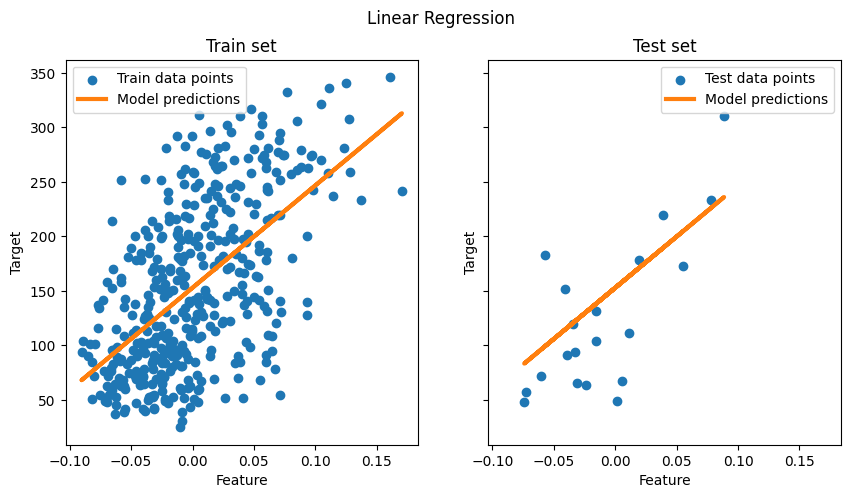

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [36]:
# Generate synthetic data
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 2)  # 100 samples, 2 features
true_coefs = [3, -2]  # True coefficients for the linear relationship
y = X @ true_coefs + np.random.randn(100) * 0.1  # Linear combination + noise

# 1. Initialize and fit the model with default parameters
model = LinearRegression()
model.fit(X, y)

# Print coefficients and intercept
print("Default Model:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 2. Make predictions and evaluate with R^2 score
y_pred = model.predict(X)
print("R^2 Score:", model.score(X, y))

# 3. Demonstrate the 'fit_intercept' hyperparameter
# Set fit_intercept=False to exclude the intercept term
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X, y)
print("\nModel without Intercept (fit_intercept=False):")
print("Coefficients:", model_no_intercept.coef_)
print("Intercept:", model_no_intercept.intercept_)  # Should be 0
print("R^2 Score:", model_no_intercept.score(X, y))

# 4. Demonstrate the 'positive' hyperparameter (available in scikit-learn >= 0.24)
# Forces coefficients to be positive
try:
    model_positive = LinearRegression(positive=True)
    model_positive.fit(X, y)
    print("\nModel with Positive Constraint (positive=True):")
    print("Coefficients:", model_positive.coef_)
    print("Intercept:", model_positive.intercept_)
except TypeError:
    print("\n'positive' parameter not available in this scikit-learn version.")

# 5. Demonstrate 'copy_X' hyperparameter
# copy_X=True (default) ensures input X is not modified; False allows potential overwrite
# Note: In LinearRegression, X is typically not modified regardless, due to the use of scipy.linalg.lstsq
model_copy_X = LinearRegression(copy_X=False)
model_copy_X.fit(X, y)
print("\nModel with copy_X=False:")
print("Coefficients:", model_copy_X.coef_)
print("Original X unchanged (first few rows):", X[:5])  # X should remain intact

# 6. Explore 'n_jobs' hyperparameter
# n_jobs specifies the number of CPUs for parallel computation, mainly useful with cross-validation
# Here, it has no effect since we're not parallelizing, but it's included for completeness
model_n_jobs = LinearRegression(n_jobs=-1)  # Use all available CPUs
model_n_jobs.fit(X, y)
print("\nModel with n_jobs=-1:")
print("Coefficients:", model_n_jobs.coef_)

# 7. Demonstrate get_params() and set_params() methods
print("\nDemonstrating get_params() and set_params():")
print("Current Parameters:", model.get_params())
model.set_params(fit_intercept=False, copy_X=False)
print("Updated Parameters:", model.get_params())
model.fit(X, y)  # Refit with updated parameters
print("Coefficients after update:", model.coef_)
print("Intercept after update:", model.intercept_)

# 8. Access additional attributes after fitting
model = LinearRegression()  # Reset to default
model.fit(X, y)
print("\nAdditional Attributes:")
print("Matrix Rank (rank_):", model.rank_)  # Rank of the input matrix
print("Singular Values (singular_):", model.singular_)  # Singular values of X
print("Number of Features Seen (n_features_in_):", model.n_features_in_)

Default Model:
Coefficients: [ 2.95737004 -1.99704249]
Intercept: 0.011450325561778496
R^2 Score: 0.9922540869274993

Model without Intercept (fit_intercept=False):
Coefficients: [ 2.96768033 -1.98746534]
Intercept: 0.0
R^2 Score: 0.9922384856714097

Model with Positive Constraint (positive=True):
Coefficients: [3.09581753 0.        ]
Intercept: -1.032079097343022

Model with copy_X=False:
Coefficients: [ 2.95737004 -1.99704249]
Original X unchanged (first few rows): [[ 0.03484372  0.22828355]
 [ 0.08879359  0.05797737]
 [-0.09031498  0.1589883 ]
 [-0.07638257  0.40486719]
 [ 0.44969298 -0.10346429]]

Model with n_jobs=-1:
Coefficients: [ 2.95737004 -1.99704249]

Demonstrating get_params() and set_params():
Current Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Updated Parameters: {'copy_X': False, 'fit_intercept': False, 'n_jobs': None, 'positive': False}
Coefficients after update: [ 2.95737004 -1.99704249]
Intercept after update: 0.0

Additiona

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [35]:
# Create a DataFrame with feature names
data = pd.DataFrame({
    "feature1": [1, 2, 3, 4],
    "feature2": [2, 4, 6, 8],
    "feature3": [3, 6, 9, 12]
})
target = [1, 2, 3, 4]

# Fit the linear regression model
model = LinearRegression()
model.fit(data, target)

# Access the feature_names_in_ attribute
print("Feature names seen during fit:", model.feature_names_in_)

Feature names seen during fit: ['feature1' 'feature2' 'feature3']


In [37]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import numpy as np

In [59]:
# Create a small sample dataset
# X represents the input features, y represents the target variable
# The point (2, 10) is an outlier relative to the trend in (1, 1), (2, 2), (3, 3)
X = np.array([[1], [2], [3], [2]])
y = np.array([1, 2, 3, 10])

# Initialize the LinearRegression model
model = LinearRegression()

In [60]:
# Fit the model without sample weights
model.fit(X, y)
print("Without sample weights:")
print("  Coefficients:", model.coef_)
print("  Intercept:", model.intercept_)

# Define sample weights: give the outlier (2, 10) a lower weight
sample_weight = np.array([1.0, 1.0, 1.0, 0.1])
model.fit(X, y, sample_weight=sample_weight)
print("\nWith sample weights (outlier weight = 0.1):")
print("  Coefficients:", model.coef_)
print("  Intercept:", model.intercept_)

Without sample weights:
  Coefficients: [1.]
  Intercept: 2.000000000000001

With sample weights (outlier weight = 0.1):
  Coefficients: [1.]
  Intercept: 0.2580645161290327


## Without sample weights, all points influence the fit equally, and the outlier pulls the line upward. With a lower weight (0.1) on the outlier, its influence decreases, resulting in a fit closer to the main trend (y ≈ x)



In [62]:
# Get parameters with deep=True
params_deep_true = model.get_params(deep=True)
print("\nParameters (deep=True):")
print(params_deep_true)

# Get parameters with deep=False
params_deep_false = model.get_params(deep=False)
print("\nParameters (deep=False):")
print(params_deep_false)


Parameters (deep=True):
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Parameters (deep=False):
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


## The deep argument determines whether to include parameters of nested objects. Since LinearRegression has no nested estimators, deep=True and deep=False yield identical results.
